In [1]:
import numpy as np
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# 폰트 설정
import matplotlib.font_manager as fm
font_list = fm.findSystemFonts(fontpaths= None, fontext= 'ttf')
mpl.rcParams['font.family'] ='Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] =False

In [3]:
df = pd.read_csv('유튜브_순위.csv')
df.head()

,카테고리,채널명,구독자수,조회수,동영상수
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579"
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729"
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223


In [4]:
# 구독자수 -> 구독자수2(정수)
df['구독자수2'] = df.구독자수.apply(lambda x: int(x.replace(',','')))
df.head()

,카테고리,채널명,구독자수,조회수,동영상수,구독자수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000


In [5]:
def str_to_int(x):
    return int(x.replace(',',''))

In [38]:
df['동영상수2'] = df.동영상수.apply(str_to_int)
df['조회수2'] = df.조회수.apply(str_to_int)
df

,카테고리,채널명,구독자수,조회수,동영상수,구독자수2,동영상수2,조회수2
0,음악/댄스/가수,BLACKPINK,"64,000,000","19,003,810,000",371,64000000,371,19003810000
1,음악/댄스/가수,HYBE LABELS,"60,300,000","18,713,050,000",654,60300000,654,18713050000
2,음악/댄스/가수,BANGTANTV,"56,400,000","12,194,960,000","1,579",56400000,1579,12194960000
3,음악/댄스/가수,SMTOWN,"28,500,000","21,870,920,000","3,729",28500000,3729,21870920000
4,키즈/어린이,Boram Tube Vlog [보람튜브 브이로그],"26,500,000","11,052,880,000",223,26500000,223,11052880000
...,...,...,...,...,...,...,...,...
995,게임,미소,"510,000","210,770,000","3,084",510000,3084,210770000
996,미분류,밉지않은 관종언니,"510,000","67,740,000",170,510000,170,67740000
997,미분류,복지마블TV [Welfare Marble],"510,000","49,960,000",240,510000,240,49960000
998,음식/요리/레시피,Muggo,"510,000","183,720,000","1,388",510000,1388,183720000


## 채널과 동영상수 Top20 막대 그래프

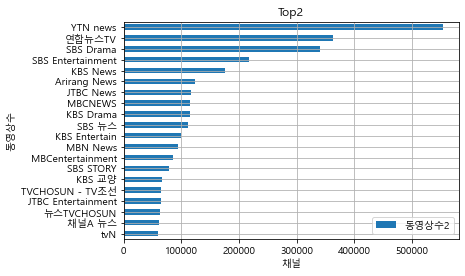

In [27]:
df2 = df[['채널명','동영상수2']].sort_values(by='동영상수2', ascending = False)
df2.set_index('채널명', inplace=True)
df2.head(20).sort_values(by='동영상수2').plot(kind = 'barh')
plt.title('Top2')
plt.xlabel('채널')
plt.ylabel('동영상수')
plt.grid()
plt.show()

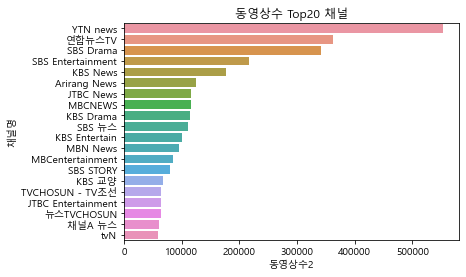

In [35]:
df2 = df[['채널명','동영상수2']].sort_values(by='동영상수2', ascending = False)
sns.barplot(x='동영상수2', y='채널명', data=df2.head(20))
plt.title('동영상수 Top20 채널')
plt.show()

#### 조회수 기준 Top20 그래프

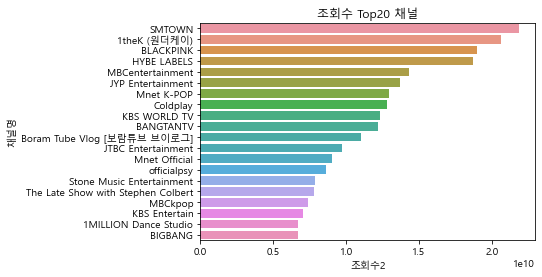

In [42]:
df2 = df[['채널명','조회수2']].sort_values(by='조회수2', ascending = False)
sns.barplot(x='조회수2', y='채널명', data=df2.head(20))
plt.title('조회수 Top20 채널')
plt.show()

### 카테고리별 채널수 분포

In [47]:
df.groupby(df.카테고리)[['채널명']].count()

,채널명
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8


In [44]:
df.카테고리.value_counts().to_frame()


,카테고리
음악/댄스/가수,171
TV/방송,146
미분류,114
키즈/어린이,88
음식/요리/레시피,85
게임,74
BJ/인물/연예인,71
뉴스/정치/사회,53
패션/미용,44
취미/라이프,38


In [48]:
df[['카테고리','채널명']].groupby('카테고리').count()

,채널명
카테고리,
BJ/인물/연예인,71
IT/기술/컴퓨터,8
TV/방송,146
게임,74
교육/강의,22
국내/해외/여행,4
뉴스/정치/사회,53
미분류,114
스포츠/운동,8


In [ ]:
df4 = df['카테고리'].value_counts().to_frame()
plt.figure()
plt.pie()

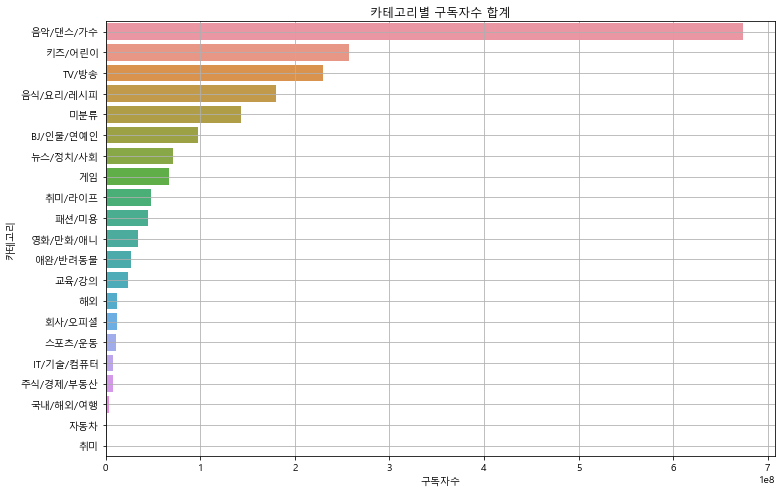

In [63]:
df5 = df[['카테고리','구독자수2']].groupby('카테고리').sum().sort_values(by='구독자수2', ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수2',y = df5.index,data=df5)
plt.title('카테고리별 구독자수 합계')
plt.xlabel('구독자수')
plt.ylabel('카테고리')
plt.grid()
plt.show()

### 카테고리별 구독자수 합계 시각화

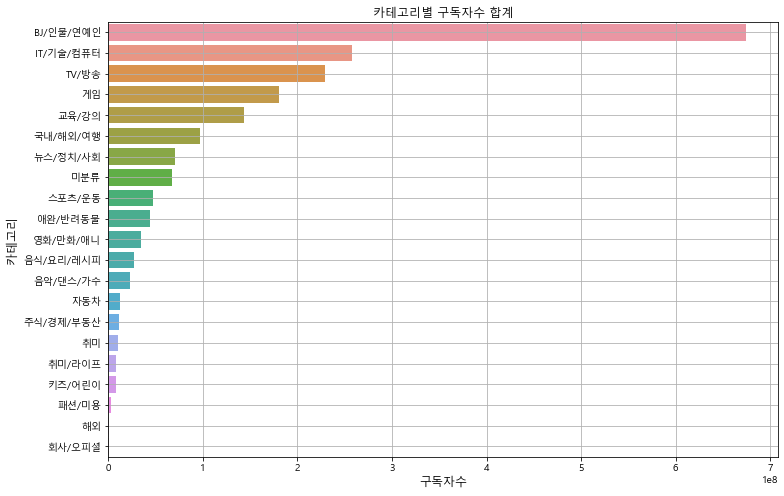

In [65]:
df5 = df[['카테고리','구독자수2']].groupby('카테고리').agg(['count','sum'])
df5.columns = ['채널수', '구독자수 합계']
plt.figure(figsize=(12,8))
sns.barplot(x='구독자수 합계',y=df5.index, data=df5.sort_values(by='구독자수 합계', ascending=False))
plt.title('카테고리별 구독자수 합계', size=12)
plt.xlabel('구독자수',size=12)
plt.ylabel('카테고리',size=12)
plt.grid()
plt.show()